<a href="https://colab.research.google.com/github/yminomo/test/blob/main/HPfilter0507.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

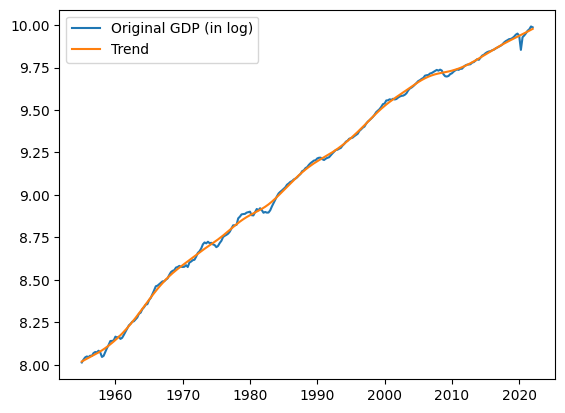

In [1]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas_datareader as pdr
import numpy as np

# set the start and end dates for the data
start_date = '1955-01-01'
end_date = '2022-01-01'

# download the data from FRED using pandas_datareader
gdp = web.DataReader('GDPC1', 'fred', start_date, end_date)
log_gdp = np.log(gdp)

# calculate the quarterly percent change in real GDP
gdp_pct_change = gdp.pct_change(4)

# apply a Hodrick-Prescott filter to the data to extract the cyclical component
cycle, trend = sm.tsa.filters.hpfilter(log_gdp, lamb=1600)

# Plot the original time series data
plt.plot(log_gdp, label="Original GDP (in log)")

# Plot the trend component
plt.plot(trend, label="Trend")

# Add a legend and show the plot
plt.legend()
plt.show()
